In [6]:
import numpy as np
import pandas as pd
import plotnine as pn
from rdot import distortion, ba_basic

In [7]:
x = np.array([0,1]) # Binary input
xhat = np.array([0,1]) # Binary reconstruction
p = 0.5 # P(X=1) = p
px = np.array([1-p, p])

# distortion matrix
dist_mat = distortion.hamming(*np.meshgrid(x, xhat))        

# Test many values of beta to sweep out a curve. 
betas = np.logspace(-5, 5, num=100)        

rd_values = ba_basic.ba_iterate(px, dist_mat, betas)

In [14]:
rd_values[20]

(1.9791947636349505e-07, 0.49973809608575587)

In [9]:
data = pd.DataFrame(rd_values, columns=["rate", "distortion"])
data

,rate,distortion
0,1.803357e-11,0.499997
1,2.871481e-11,0.499997
2,4.572209e-11,0.499996
3,7.280221e-11,0.499995
4,1.159219e-10,0.499994
...,...,...
95,1.000000e+00,0.000000
96,1.000000e+00,0.000000
97,1.000000e+00,0.000000
98,1.000000e+00,0.000000


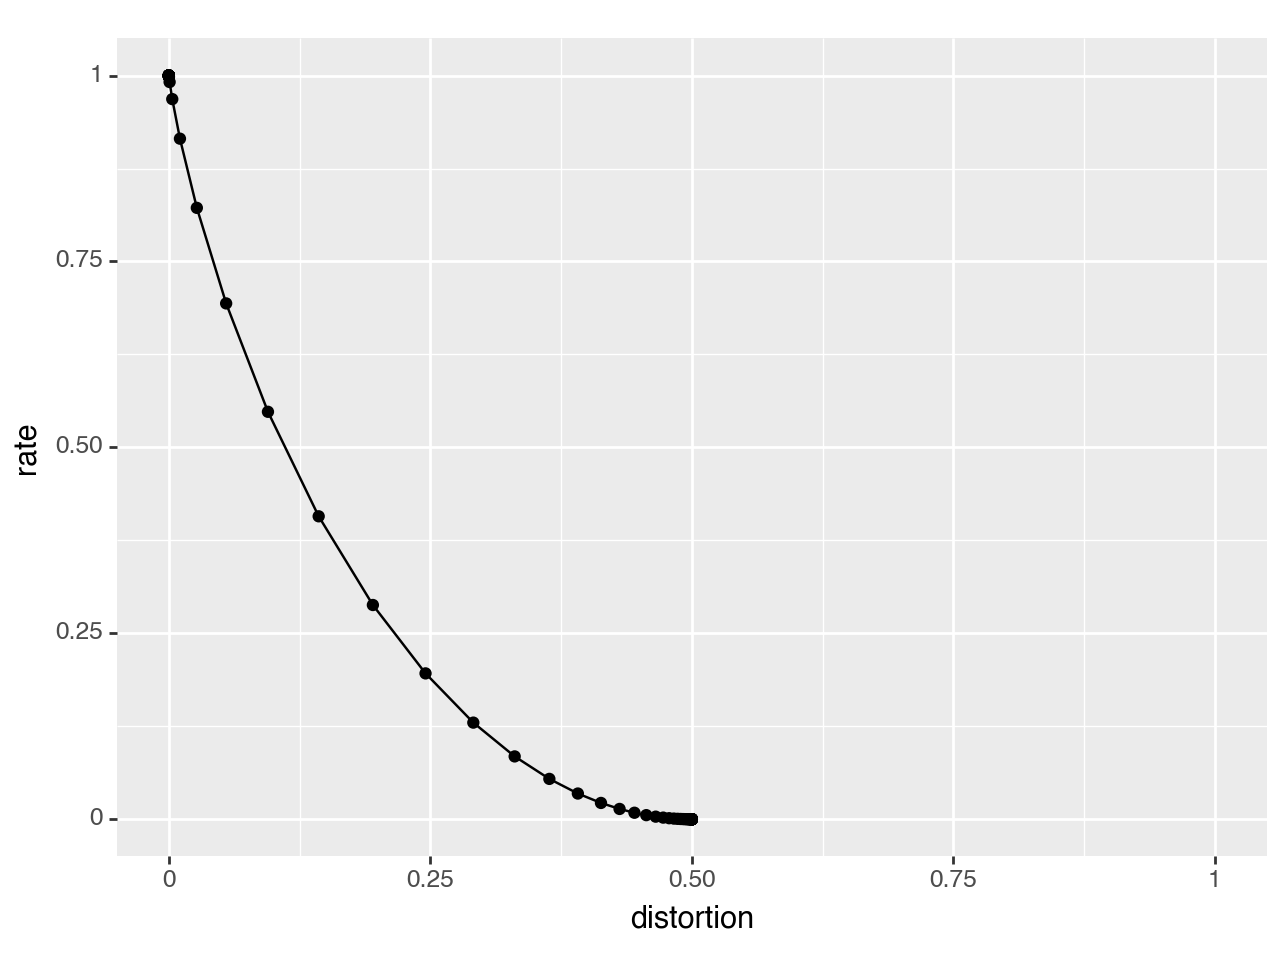

<Figure Size: (640 x 480)>

In [13]:
# Compare to figure 10.4 of Cover and Thomas
(
    pn.ggplot(data, pn.aes(x="distortion", y="rate"))
    + pn.geom_point()
    + pn.geom_line()
    + pn.xlim(0,1)
)